# <center> Classificação de Vinhos</center>

## Avaliação da Classificação com Base na Qualidade: RandomForestClassifier vs. XGBClassifier

O propósito deste estudo foi avaliar o desempenho de dois algoritmos de classificação, tendo a qualidade como critério principal. Durante a exploração das bibliotecas RandomForestClassifier e XGBClassifier, observei que, ao padronizar os dados com StandardScaler, reduzir o escopo para duas categorias de qualidade, nomeadas como "Good" (Bom) e "Not Good" (Não Bom) e balnacear os alvos da base (Tomek links e SMOTE) a precisão do modelo foi significativamente aprimorada. A simplificação envolveu a reclassificação de notas acima de 7 como "Good" e, posteriormente, a representação binária, onde 1 passou a indicar "Good" e 0, "Not Good", conforme as orientações do Kaggle de onde foi retirada a base para análise.


# Os resultados de acurácia obtidos foram os seguintes:

<strong>Base padronizada e desbalanceada:</strong><br>

Acerto do modelo com RandomForestClassifier: <strong>89% </strong><br>
Acerto do modelo com XGBClassifier: <strong>90% </strong>


## Base padronizada e com tratamento de balanceamento:

<strong>Subamostragem (undersampling) - Tomek links: </strong><br>
Acerto do modelo com RandomForestClassifier: <strong>92%</strong><br>
Acerto do modelo com XGBClassifier: <strong>92% </strong>

<strong>Sobremostragem (oversampling) - SMOTE </strong><br>
Acerto do modelo com RandomForestClassifier: <strong>94%</strong> <br>
Acerto do modelo com XGBClassifier: <strong>95% </strong>


# Avaliação Geral:

O modelo <strong> XGBClassifier com base padronizada e com tratamento de balanceamento com "oversampling"</strong> apresenta um desempenho <strong> geral muito bom</strong>, com precisão, recall e pontuação F1 elevados para ambas as classes.<br>
A <strong>acurácia de 95% </strong> indica que o modelo acertou 95% das previsões no conjunto de teste.<br>
Os resultados são balanceados para ambas as classes "Good" e "Not Good", indicando que o modelo é capaz de lidar efetivamente com ambas as categorias.


In [537]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
import numpy as np
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [490]:
df = pd.read_csv("winequality-red.csv")

In [491]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [492]:
#Verificar se há linhas vazias e o tipo de cada informação no dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


As informações da contagem de itens distintos da coluna 'quality' e os dados do describe já nos dão indicios de base desbalanceada. Há muitas notas 5 e 6 e poucas do restante.

In [493]:
df['quality'].value_counts().sort_index()

3     10
4     53
5    681
6    638
7    199
8     18
Name: quality, dtype: int64

C:\Users\Shirley Dezan\AppData\Local\Temp\ipykernel_40288\1945540834.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='quality', data=df, palette='viridis')


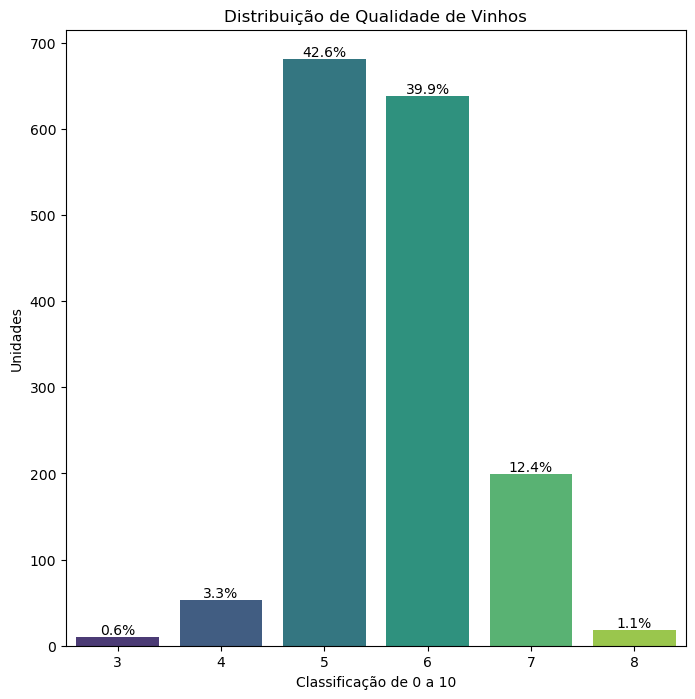

In [494]:
plt.figure(figsize=(8, 8))
ax = sns.countplot(x='quality', data=df, palette='viridis')
plt.title('Distribuição de Qualidade de Vinhos')
plt.xlabel('Classificação de 0 a 10')
plt.ylabel('Unidades')

# Calcula o número total de observações na coluna 'qualidade' do DataFrame 'df'.
total = len(df['quality'])

# Itera sobre cada barra no gráfico de barras ('ax.patches').
for barra in ax.patches:
    # Calcula a porcentagem associada a cada barra formatada como string.
    porcentagem = f'{100 * barra.get_height() / total:.1f}%'
    
    # Calcula as coordenadas para posicionar o texto acima de cada barra.
    x = barra.get_x() + barra.get_width() / 2
    y = barra.get_height() + 3
    
    # Adiciona a anotação no gráfico com a porcentagem formatada.
    ax.annotate(porcentagem, (x, y), ha='center')
    
    
plt.show()

In [495]:
#Verificar quantos amostras tem no total, média das classificações, desvio padrão, entre maximo, minimo e seus quartis. 
df['quality'].describe()

count    1599.000000
mean        5.636023
std         0.807569
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64

Criar a nota 7 ou superior sendo classificado como 'bom/1' e o restante como 'não bom/0'para o kaggle. 

In [496]:
# Primeiro vou criar uma nova coluna guia para facilitar a visualização dos dados após a transformação em 0 e 1
def categorizar_qualidade(valor):
    if valor <= 6:
        return 'Not Good'
    else:
        return 'Good'

# Aplicando a função usando apply para criar a nova coluna 'Categoria_Qualidade'
df['quality'] = df['quality'].apply(categorizar_qualidade)

In [497]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Not Good
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Not Good
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Not Good
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Not Good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Not Good


In [498]:
#Deixar uma coluna com as informações 'Good' = 1 e 'Not Good' = 0 para o modelo de treino e teste. 
df['quality_byn'] = df['quality'].map({'Not Good':0,
                                      'Good': 1})
#outra opção:
#df['quality_byn'] = df['quality'].apply(lambda x: 1 if x >= 7 else 0)

In [499]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_byn
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Not Good,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Not Good,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Not Good,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Not Good,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Not Good,0


Verificando se a contagem de valores distintos é a mesma entre as duas colunas

In [500]:
df['quality'].value_counts()

Not Good    1382
Good         217
Name: quality, dtype: int64

In [501]:
df['quality_byn'].value_counts()

0    1382
1     217
Name: quality_byn, dtype: int64

C:\Users\Shirley Dezan\AppData\Local\Temp\ipykernel_40288\951237174.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='quality', data=df, palette='viridis')


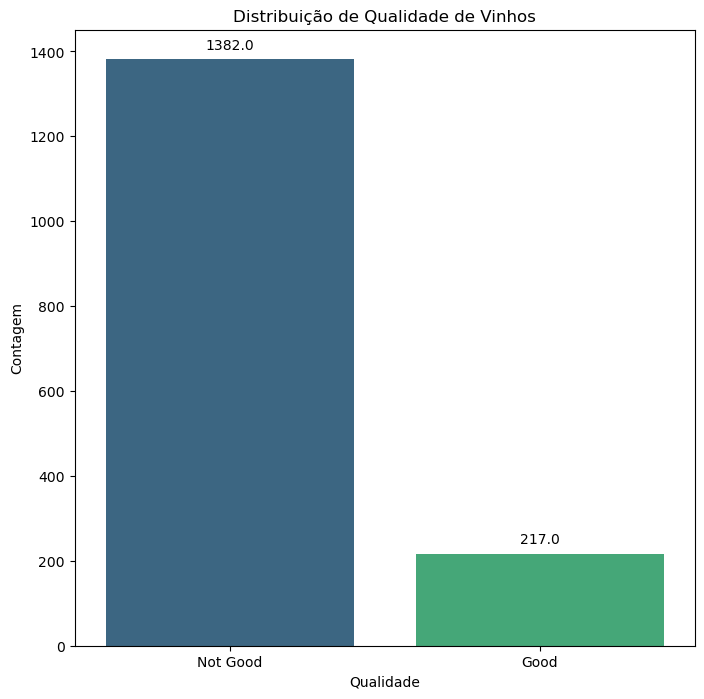

In [502]:
plt.figure(figsize=(8, 8))
ax = sns.countplot(x='quality', data=df, palette='viridis')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    
plt.title('Distribuição de Qualidade de Vinhos')
plt.xlabel('Qualidade')
plt.ylabel('Contagem')
plt.show()

In [503]:
#Excluir coluna do quality com Good ou Not Good e a coluna quality_byn 
df_base = df.drop(['quality','quality_byn'], axis=1)

#Criar uma cópia da coluna quality_byn para não ser padronizada, esta coluna será nosso alvo e precisa ficar em números
#inteiros 0 e 1
df_quality = df['quality_byn'].copy()

In [504]:
display(df_base)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


# Padronização dos dados - StandardScaler


In [505]:
# Inicializando o scaler
scaler = StandardScaler()

# Padronizando os dados do DataFrame
df_padrao = pd.DataFrame(scaler.fit_transform(df_base), columns=df_base.columns)


In [506]:
df_padrao = pd.concat([pd.DataFrame(df_padrao, columns=df_padrao.columns), df_quality], axis=1)

In [507]:
df_padrao.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_byn
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,0
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,0
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,0
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777,0
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,0


# Criando X e y para treinos base padronizada, sem tratamento de balanceamento

In [508]:
X = df_padrao.drop('quality_byn', axis=1).copy()
y = df_padrao['quality_byn'].copy()

In [509]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y , test_size = 0.2, stratify=y)

In [510]:
X_treino.shape, X_teste.shape, y_treino.shape, y_teste.shape

((1279, 11), (320, 11), (1279,), (320,))

# Modelos de treino com RandomForest e XGBClassifier

In [511]:
def classificacao(lista):
    X_treino, X_teste, y_treino, y_teste = lista
 

    clf = RandomForestClassifier()
    clf.fit(X_treino, y_treino)
    y_pred_random = clf.predict(X_teste)
    acuracia_random = accuracy_score(y_pred_random, y_teste)

    
    modelo_xgb = XGBClassifier()
    modelo_xgb.fit(X_treino, y_treino)
    previsoes_xgb = modelo_xgb.predict(X_teste)
    acuracia_xgb = accuracy_score(y_teste, previsoes_xgb)


    return (f'Acurácia do RandomForestClassifier: {acuracia_random}',
            f'Acurácia do XGBClassifier: {acuracia_xgb}'), previsoes_xgb

#deixei retornando o previsoes_xgb para usar na matriz de confusão, já que foi o melhor modelo



In [512]:
lista = X_treino, X_teste, y_treino, y_teste
base_padronizada = classificacao(lista)

In [513]:
base_padronizada

(('Acurácia do RandomForestClassifier: 0.89375',
  'Acurácia do XGBClassifier: 0.9'),
 array([0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
        0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 1, 1, 

# Balançando as variáveis alvos para teste

A base para treino conforme é apresentado nos gráficos está desbalanceada. Temos <strong>86,4% da base com classificação de vinhos alvos "Not Good" para 13,6% de alvos "Good"</strong>. Com esta apresentação de dados para treino, o <strong>modelo pode se tornar tendencioso</strong> em direção à classe majoritária ("Not Good"), pois há mais exemplos dessa classe para aprender, com isto, o modelo pode acabar sendo melhor em prever a classe majoritária, mas menos preciso para a classe minoritária ("Good").

Para testar a qualidade da acurácia com modelos balanceados, vamos testar duas técnicas: 

1. <strong>Subamostragem (undersampling) - Tomek links:</strong><br>
    Envolve a redução do número de instâncias classificadas como "Not Good" para igualá-las à quantidade presente na categoria "Good". 
    
2. <strong>Sobremostragem (oversampling) - SMOTE:</strong><br>
     Envolve no aumento do número de instâncias classificadas como "Good" para igualá-las à quantidade presente na categoria "Not Good".
   

# Subamostragem (undersampling) - Tomek links 

In [514]:
#majority = manipular a maior categoria, que tem mais dados
tl = TomekLinks(sampling_strategy='majority')
#é necessário criar novas variaveis para x e y
X_under, y_under = tl.fit_resample(X, y)

In [515]:
#ver a quantidade de amostras que ficou, linhas e colunas
X_under.shape, y_under.shape

((1566, 11), (1566,))

In [516]:
#Acessar a base de dados original para ver as quantidades
np.unique(y, return_counts=True)

(array([0, 1], dtype=int64), array([1382,  217], dtype=int64))

In [517]:
#separar a quantidade de linhas de 0 e 1 ("Not Good" e "Good") da base , sem tratar
np.unique(y_under, return_counts =True)

(array([0, 1], dtype=int64), array([1349,  217], dtype=int64))

In [518]:
#base para treino undersampling

X_treinamento_u, X_teste_u, y_treinamento_u, y_teste_u = train_test_split(X_under,
                                                         y_under,
                                                         test_size=0.2,
                                                         stratify=y_under)
X_treinamento_u.shape, X_teste_u.shape

((1252, 11), (314, 11))

In [519]:
lista = X_treinamento_u, X_teste_u, y_treinamento_u, y_teste_u
base_under = classificacao(lista)

In [520]:
base_under

(('Acurácia do RandomForestClassifier: 0.9267515923566879',
  'Acurácia do XGBClassifier: 0.9203821656050956'),
 array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,


# Sobremostragem (oversampling) - SMOTE  

In [521]:
smote = SMOTE(sampling_strategy='minority')
X_over, y_over = smote.fit_resample(X, y)

In [522]:
#separar a quantidade de linhas de 0 e 1 (pagantes e não pagantes)
#da base , sem tratar
np.unique(y, return_counts =True)

(array([0, 1], dtype=int64), array([1382,  217], dtype=int64))

In [523]:
#separar a quantidade de linhas de 0 e 1 (pagantes e não pagantes)
#da base tratada 100% balanceada
np.unique(y_over, return_counts =True)

(array([0, 1], dtype=int64), array([1382, 1382], dtype=int64))

In [524]:
#usar as bases para treinar o algoritmo
X_treinamento_o, X_teste_o, y_treinamento_o, y_teste_o = train_test_split(X_over, y_over,
                                                                         test_size = 0.2,
                                                                         stratify=y_over)

In [525]:
#comparar as bases
X_treinamento_o.shape, X_teste_o.shape

((2211, 11), (553, 11))

In [526]:
lista = X_treinamento_o, X_teste_o, y_treinamento_o, y_teste_o
base_over = classificacao(lista)

In [527]:
base_over

(('Acurácia do RandomForestClassifier: 0.9475587703435805',
  'Acurácia do XGBClassifier: 0.9511754068716094'),
 array([1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
        0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
        1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
        0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
        1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
        0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
        0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
        0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,


# Matriz de confusão

Para concluir, foi examinado o mapa de calor da matriz de confusão, obtido a partir do <strong> modelo treinado com o XGBClassifier </strong> , utilizando a base de dados <strong> padronizada</strong>  e a técnica de <strong> oversampling</strong> , que resultou na <strong> melhor acurácia de 95%.</strong> 

In [533]:
#Verdadeiro positivo	Falso positivo,
#Falso negativo,	Verdadeiro negativo
a,previsoes = classificacao(lista)
cm_o = confusion_matrix(previsoes, y_teste_o)
cm_o

array([[254,   4],
       [ 23, 272]], dtype=int64)

<Axes: >

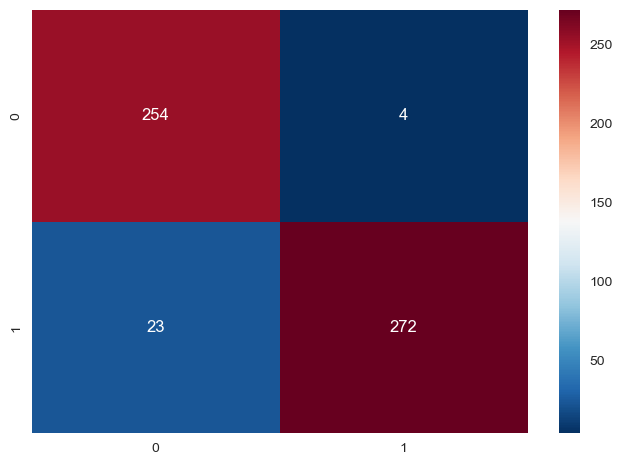

In [534]:
sns.heatmap(cm_o, annot=True, fmt='g', cmap= 'RdBu_r')

#Verdadeiro positivo	Falso positivo,
#Falso negativo,	Verdadeiro negativo

In [541]:
print(classification_report(y_teste_o, previsoes))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95       277
           1       0.92      0.99      0.95       276

    accuracy                           0.95       553
   macro avg       0.95      0.95      0.95       553
weighted avg       0.95      0.95      0.95       553



# O relatório de classificação

<strong> Precision (Precisão): </strong> <br>

Para a classe 0 (not good): 0.98<br>
Para a classe 1 (good): 0.92<br>
A precisão mede a proporção de instâncias previstas como positivas que são realmente positivas. Uma precisão de 0.98 para a classe 0 significa que, quando o modelo prevê que algo é "not good", ele está correto em 98% das vezes.<br>

<strong> Recall (Revocação):</strong> <br>

Para a classe 0 (not good): 0.92<br>
Para a classe 1 (good): 0.99<br>
A revocação mede a proporção de instâncias positivas que foram corretamente previstas pelo modelo. Um recall de 0.92 para a classe 0 significa que o modelo captura 92% das instâncias reais da classe "not good".<br>

<strong> F1-Score:</strong> <br>

Para a classe 0 (not good): 0.95<br>
Para a classe 1 (good): 0.95<br>
A pontuação F1 é a média harmônica ponderada da precisão e do recall. É uma métrica que equilibra precisão e recall. Valores mais próximos de 1 são desejados.<br>

<strong> Support (Suporte):</strong> <br>

Para a classe 0 (not good): 277<br>
Para a classe 1 (good): 276<br>
O suporte é o número real de instâncias de cada classe no conjunto de teste.<br>

<strong> Acurácia (Accuracy):</strong> <br>

0.95<br>
A acurácia é a proporção de instâncias corretamente previstas em relação ao total. Neste caso, 95% das previsões foram corretas.<br>
